<a href="https://colab.research.google.com/github/harrisonb3/HCI-Visual-Assistant-for-FAQ/blob/main/ComputerVisionHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# Provided function on CIFAR-10 website: https://www.cs.toronto.edu/~kriz/cifar.html
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
# Requires us to upload data_batch_1 from local machine
filename = f'data_batch_1'
batch1 = unpickle(filename)

# Labels: 0-9 for each unique class
# Data: "10000x3072 array of uint8s. Each row of the array stores a 32x32 colour image. 1024 red, green, blue
batch1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [ ]:
# Preprocess
batch1data = batch1[b'data']

# reshape each entry into 32 by 32 by 3 (RGB)
# transpose each entry into 32 by 3 by 32
batch1data = batch1data.reshape(len(batch1data),3,32,32).transpose(0,2,3,1)

In [ ]:
# Obtain the first image of each unique class
first_unique = [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]
imgs = []
counter = 0
for x in range(100):
  if (first_unique[batch1[b'labels'][x]] == -1):
    first_unique[batch1[b'labels'][x]] = x
    imgs.append(batch1data[x])
    counter = counter + 1
    if (counter == 10):
      break

Problem 1: Filtering

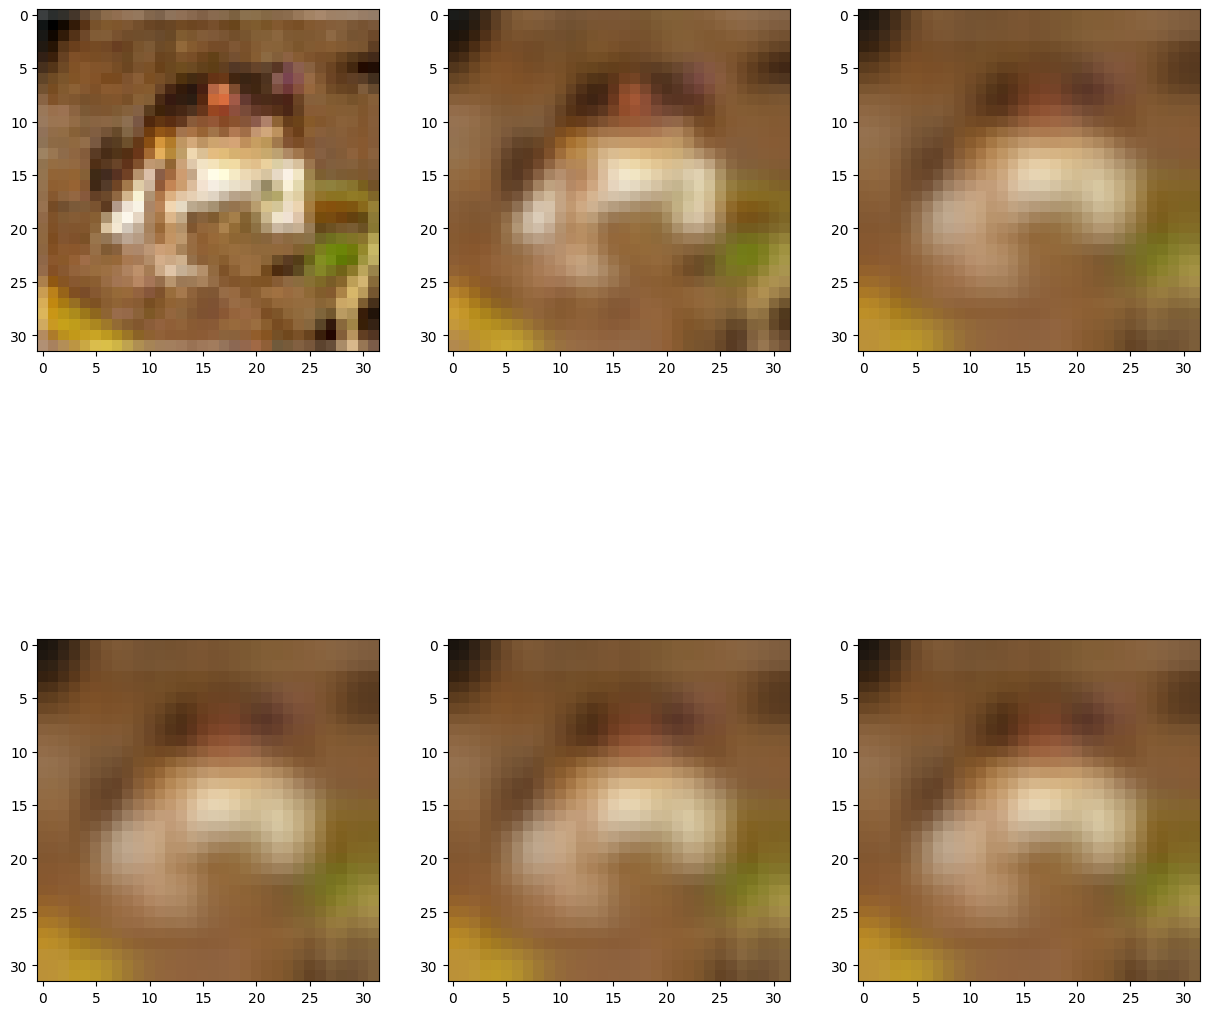

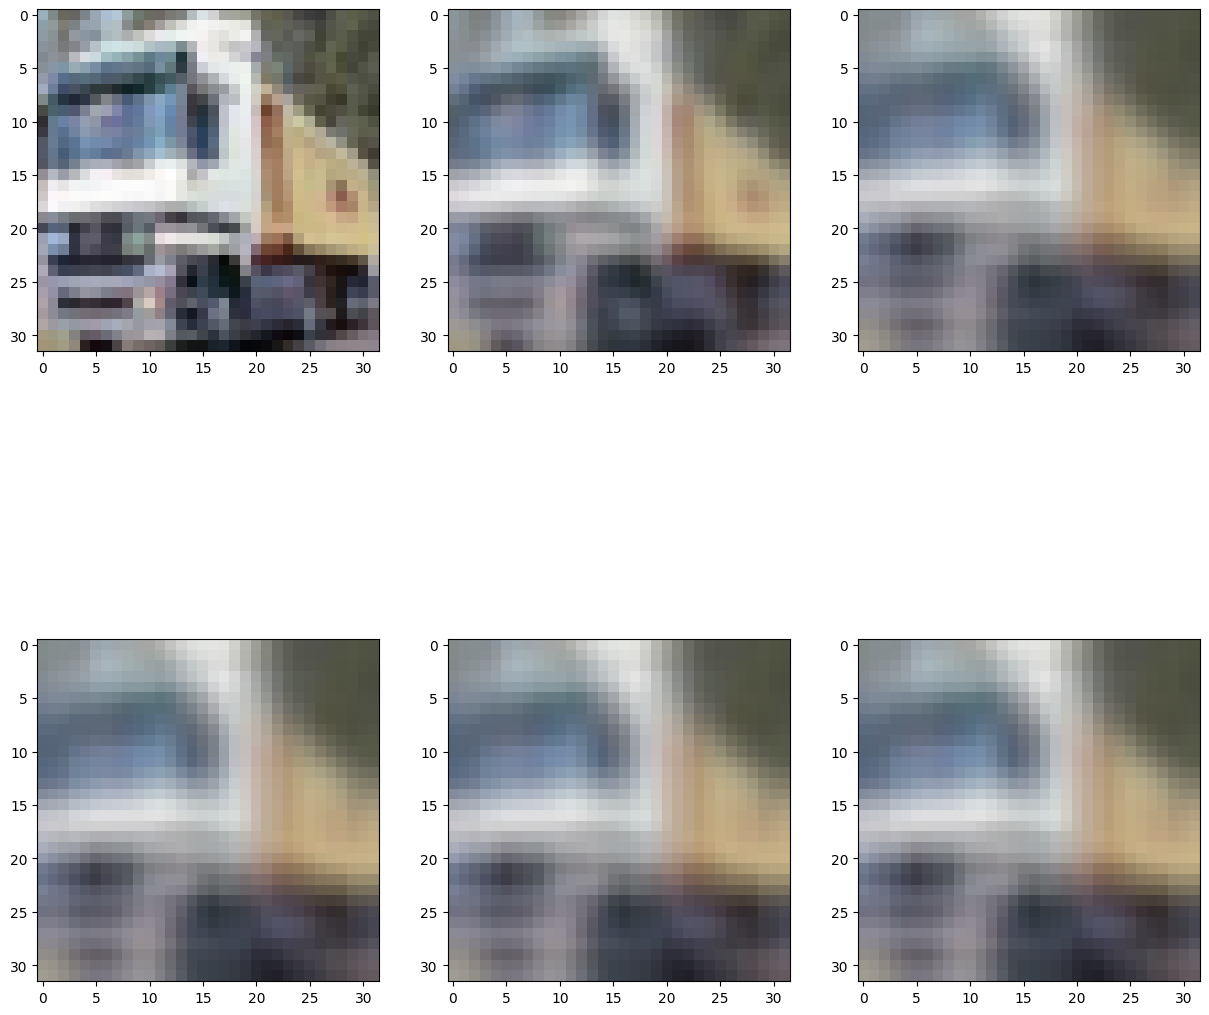

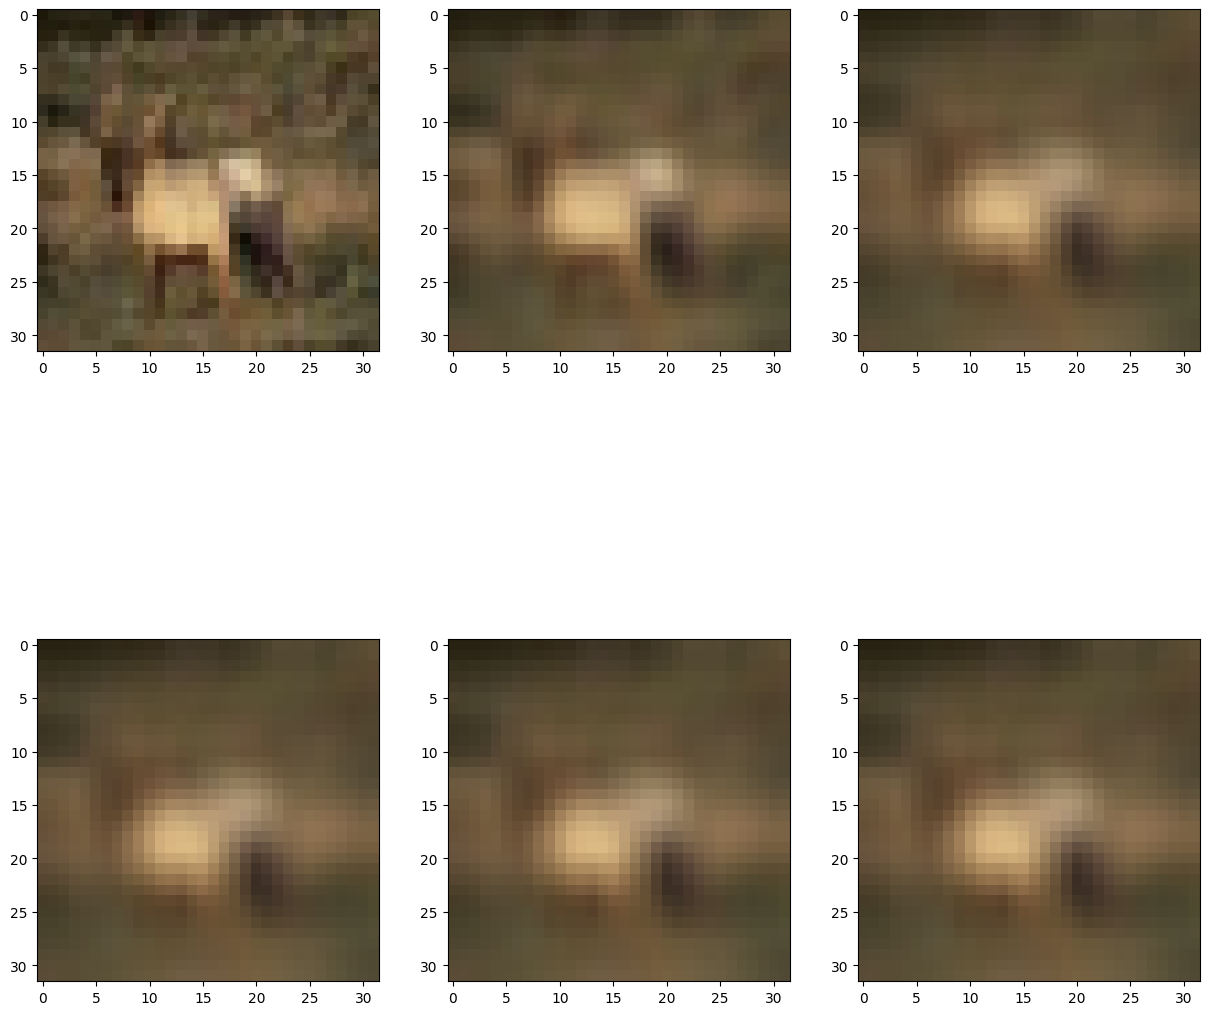

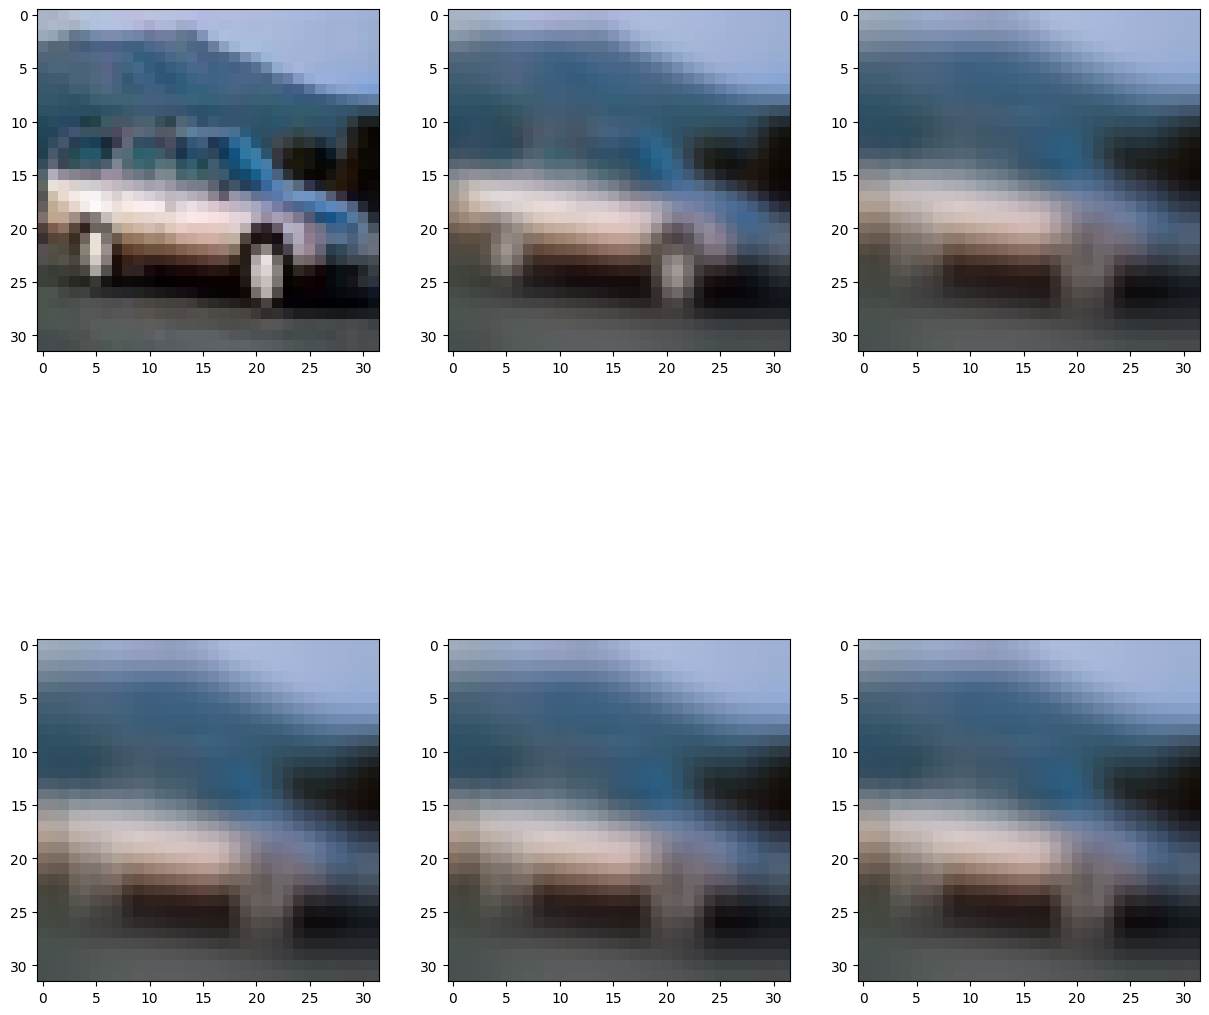

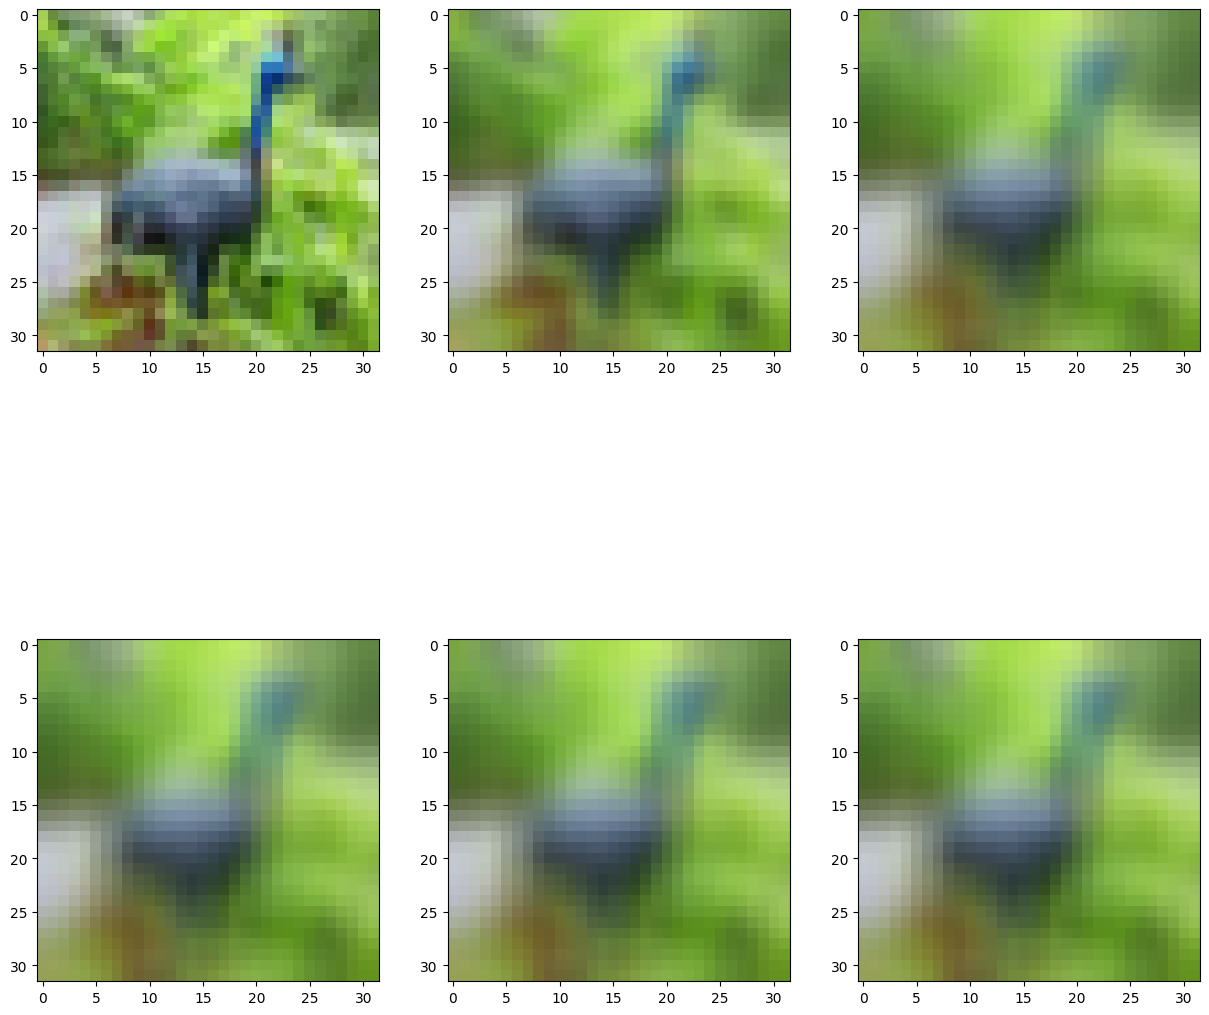

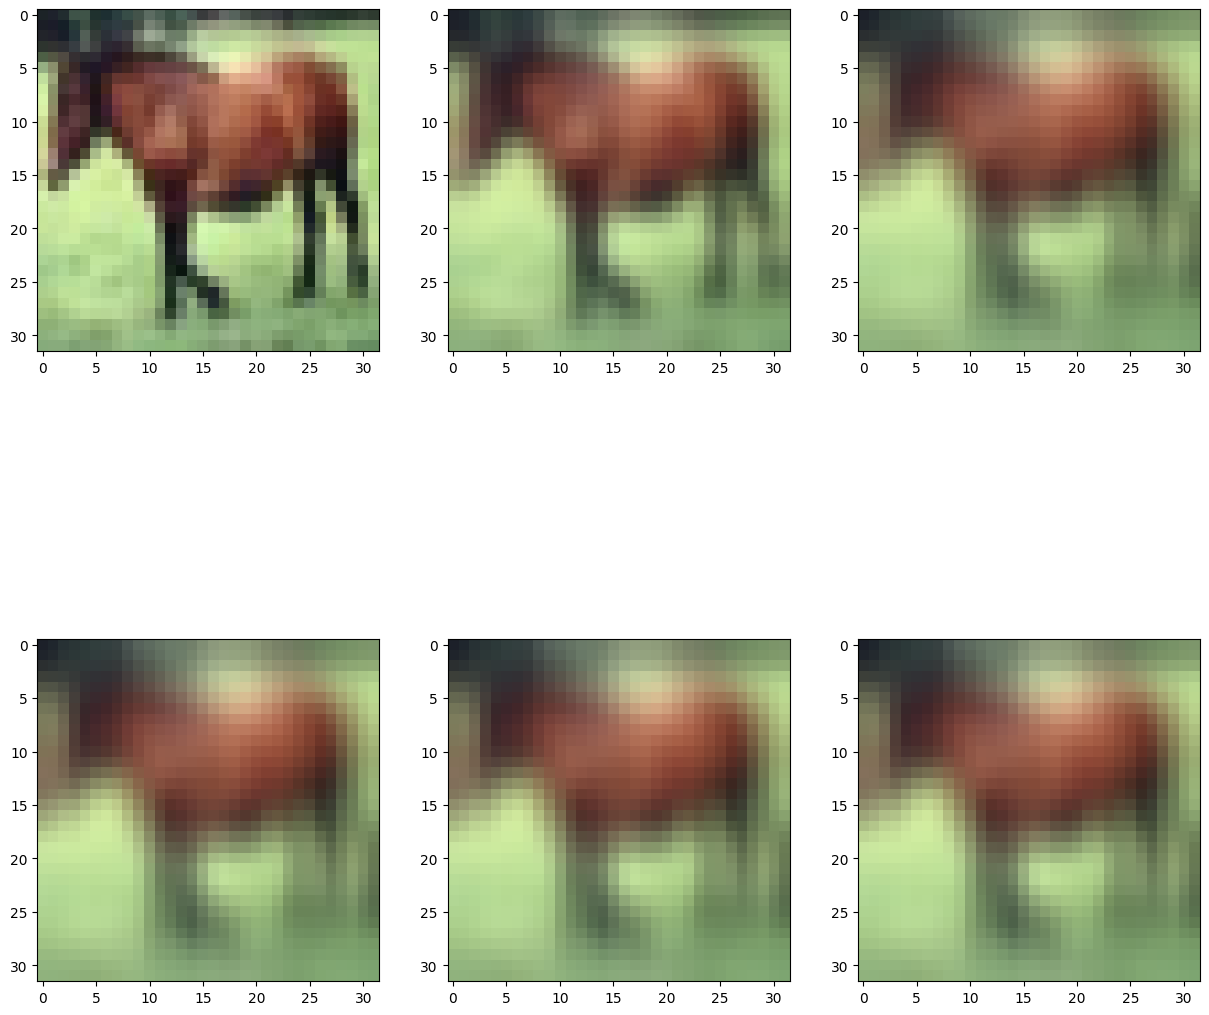

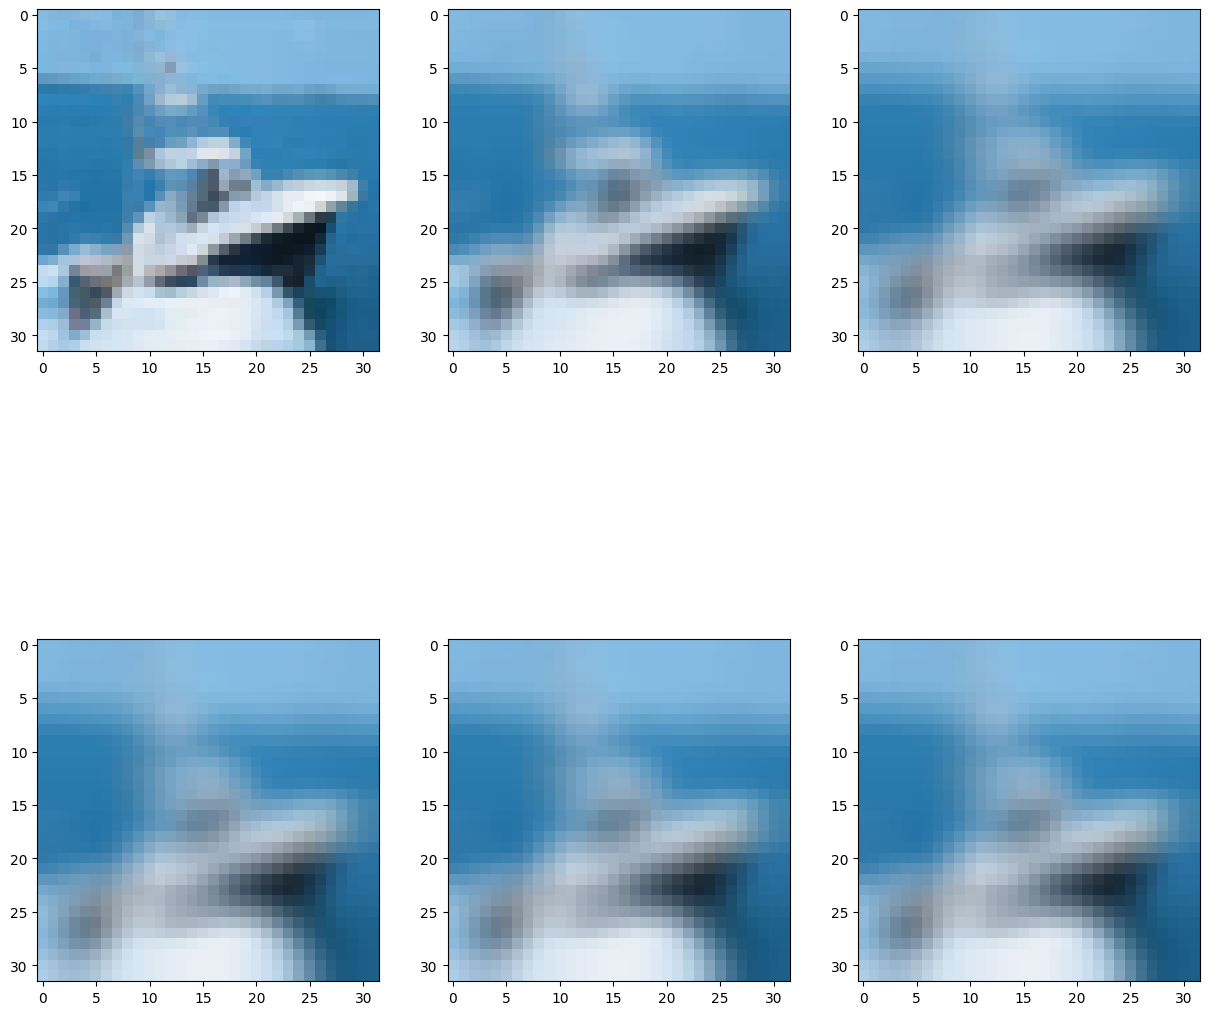

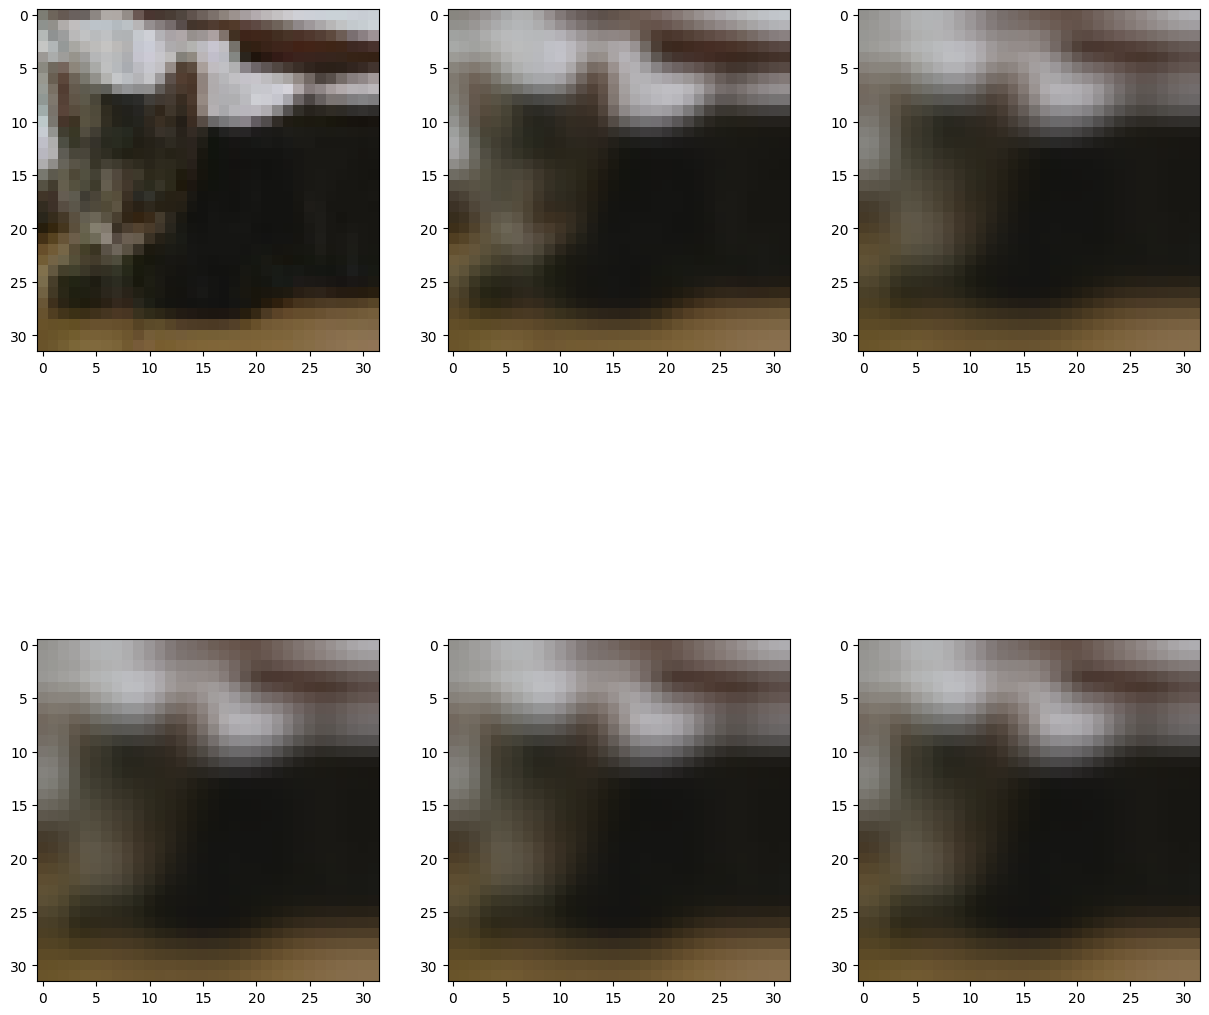

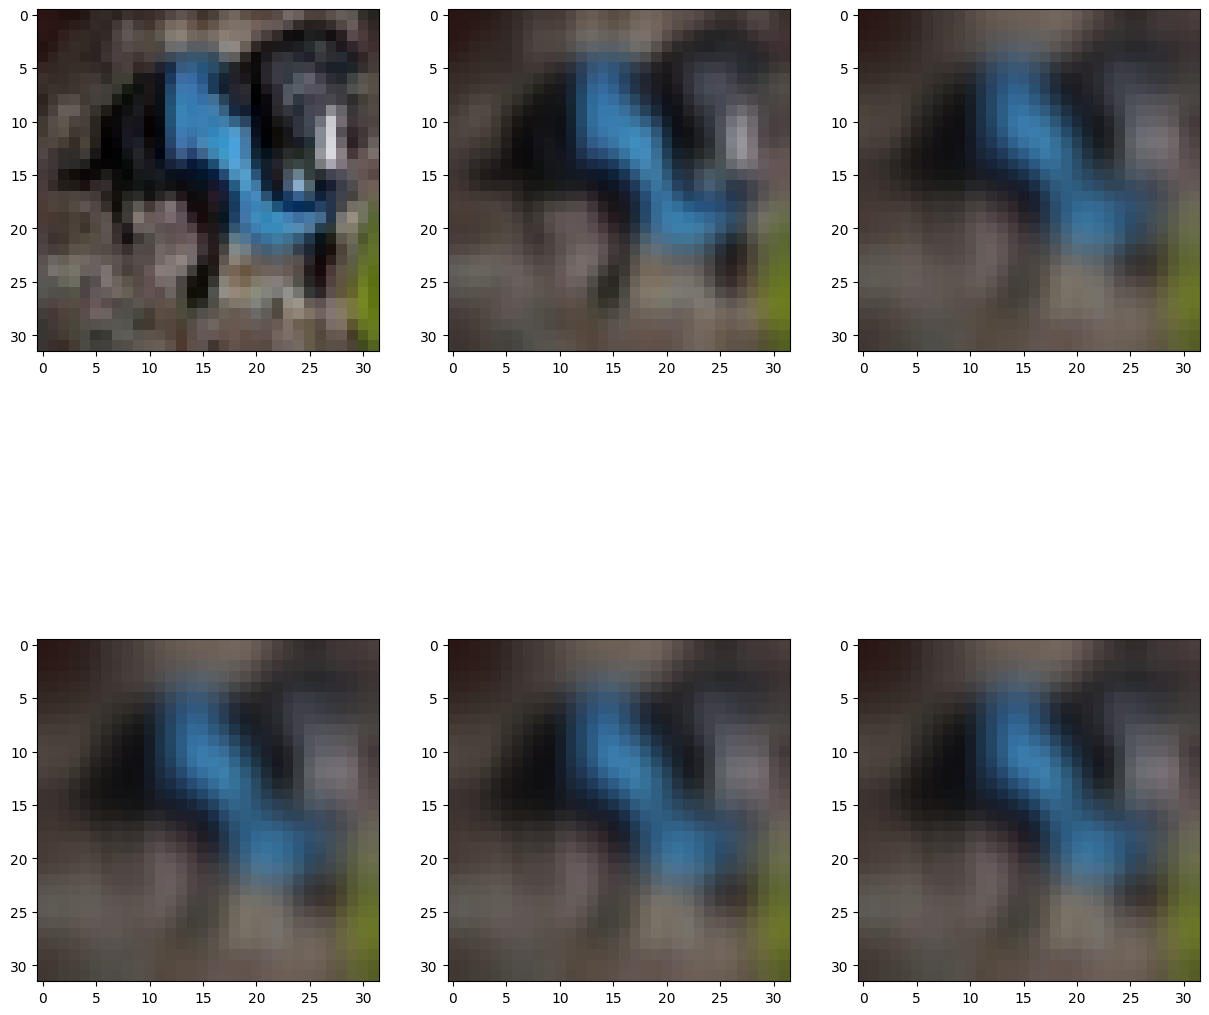

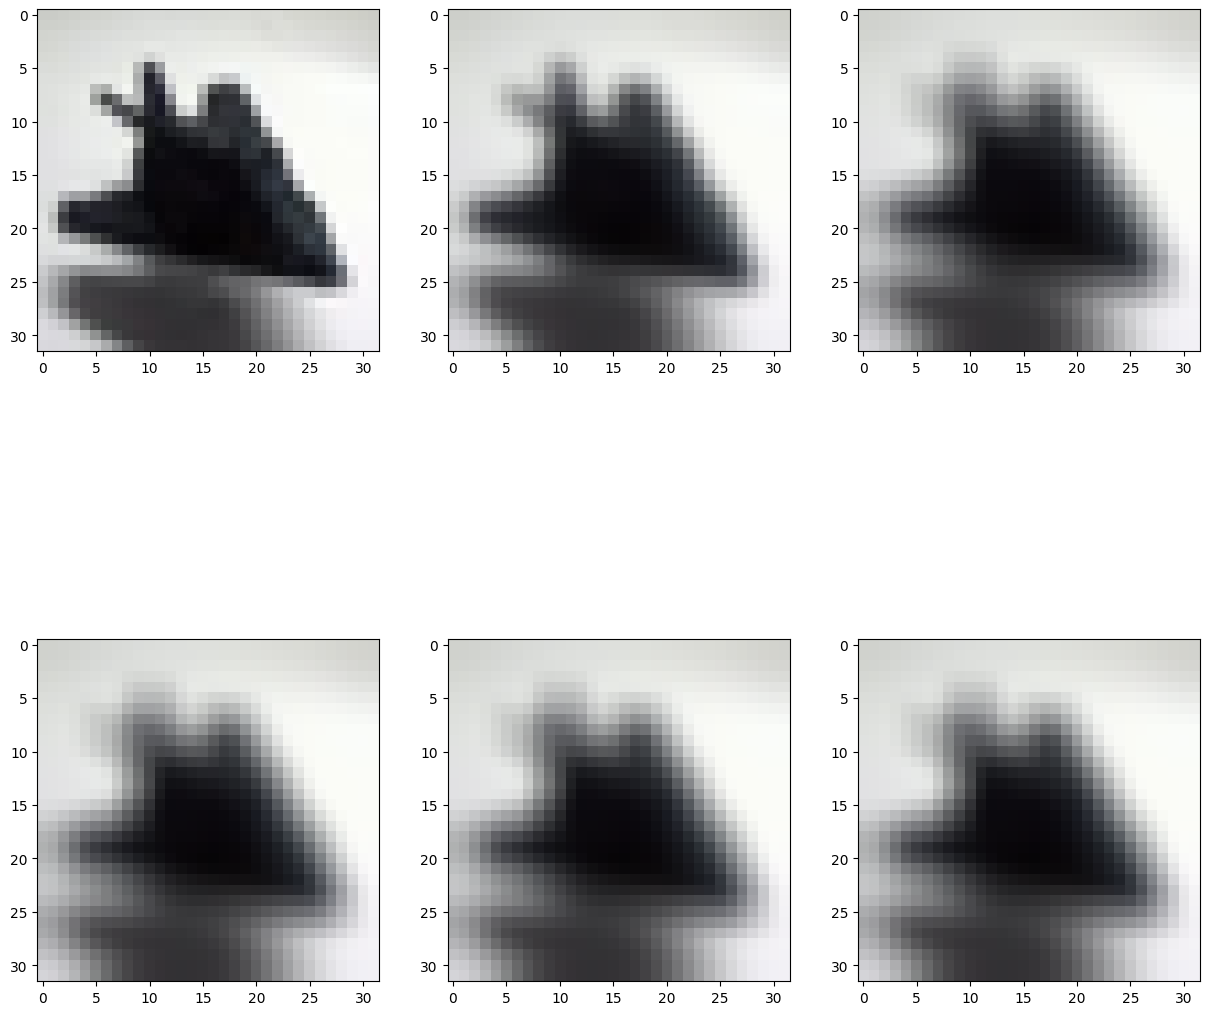

In [ ]:
# Gaussian Blur (src, size, sigma)

# Format: Display each image undergoing gaussian blur with increasing sigma value
# kernel size: 5x5
sigmas = [1,5,10,50,100]
for i in range(10):
  fig,axs = plt.subplots(2,3,figsize=(15,15))
  axs[0,0].imshow(imgs[i])  # first image is default
  for x in range(1,6):
    axs[int(x/3),x%3].imshow(cv2.GaussianBlur(imgs[i],(5,5),sigmas[x-1]))
plt.show()

The Gaussian filter is used to remove Gaussian noise by smoothening image pixels and reducing high-frequency components.
Sigma controls the standard deviation of the distribution.
As sigma increases, the Gaussian curve widens; this increases the spread of the Gaussian kernel (which is 5x5 in this case). In other words, each pixel has more impact on their neighboring pixels, resulting in increased blurring.

The first image is the default. The following 5 are the results of passing the image through the Gaussian filter with sigma 1, 5, 10, 50, 100 respectively.

The most notable changes are when sigma is 1, 5, and 10 as the image gets blurrier as sigma increases. The difference in blurriness between sigma = 10 and sigma = 50 and 100 are not noticeable.

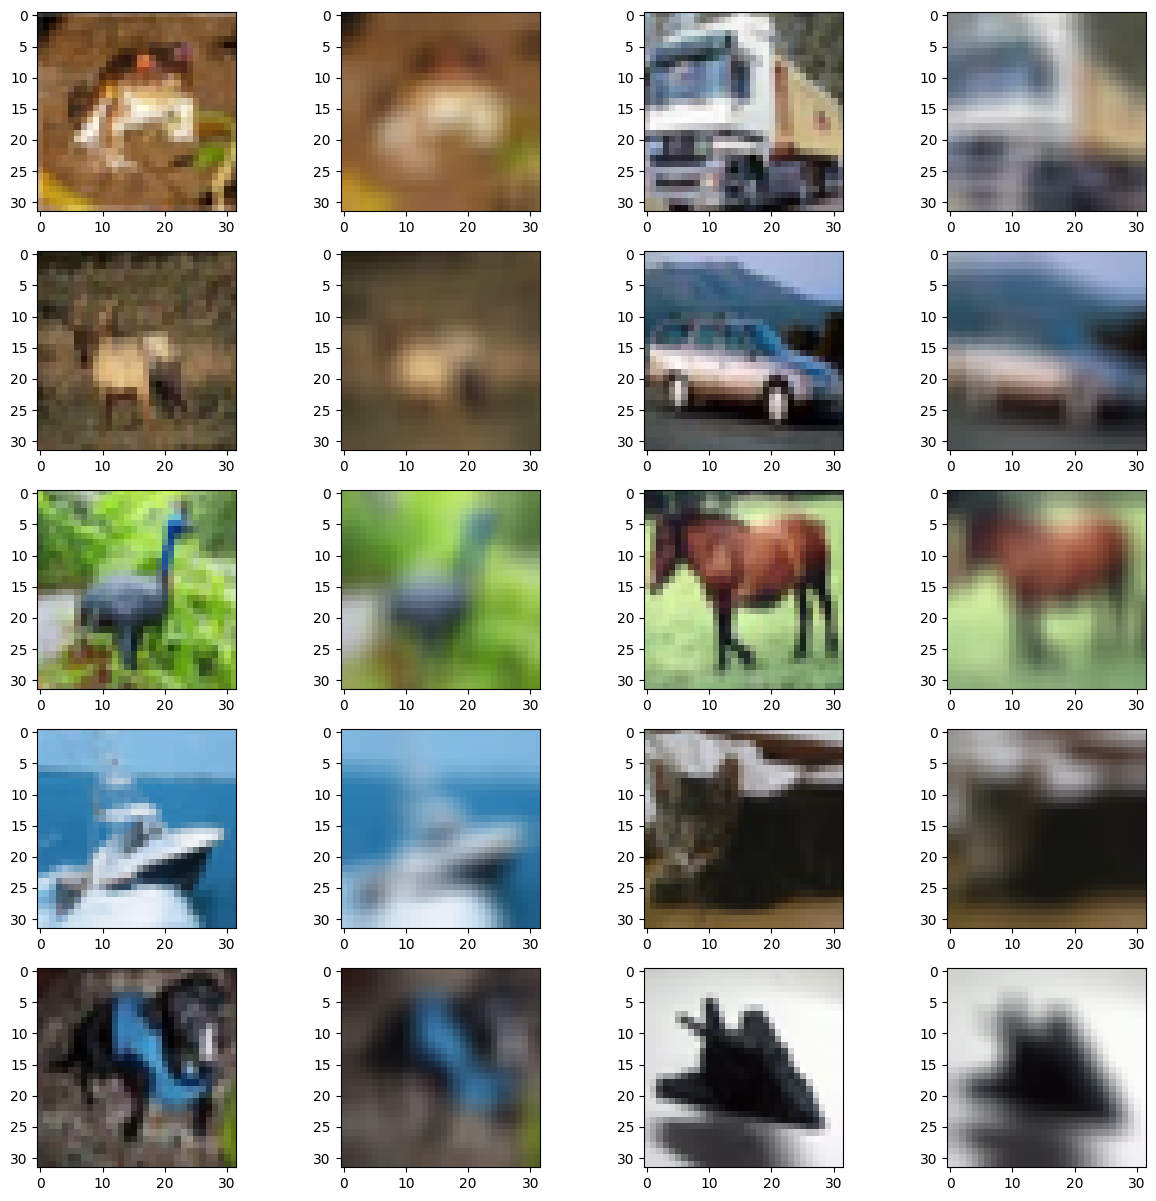

In [ ]:
#Moving Average Filter (src, ksize)
# kernel size: 5x5
# Default followed by filtered image
fig,axs = plt.subplots(5,4,figsize=(15,15))
for i in range(10):
  axs[int(i*2/4),(i*2)%4].imshow(imgs[i])
  axs[int(i*2/4),(i*2)%4+1].imshow(cv2.blur(imgs[i],(5,5)))
plt.show()

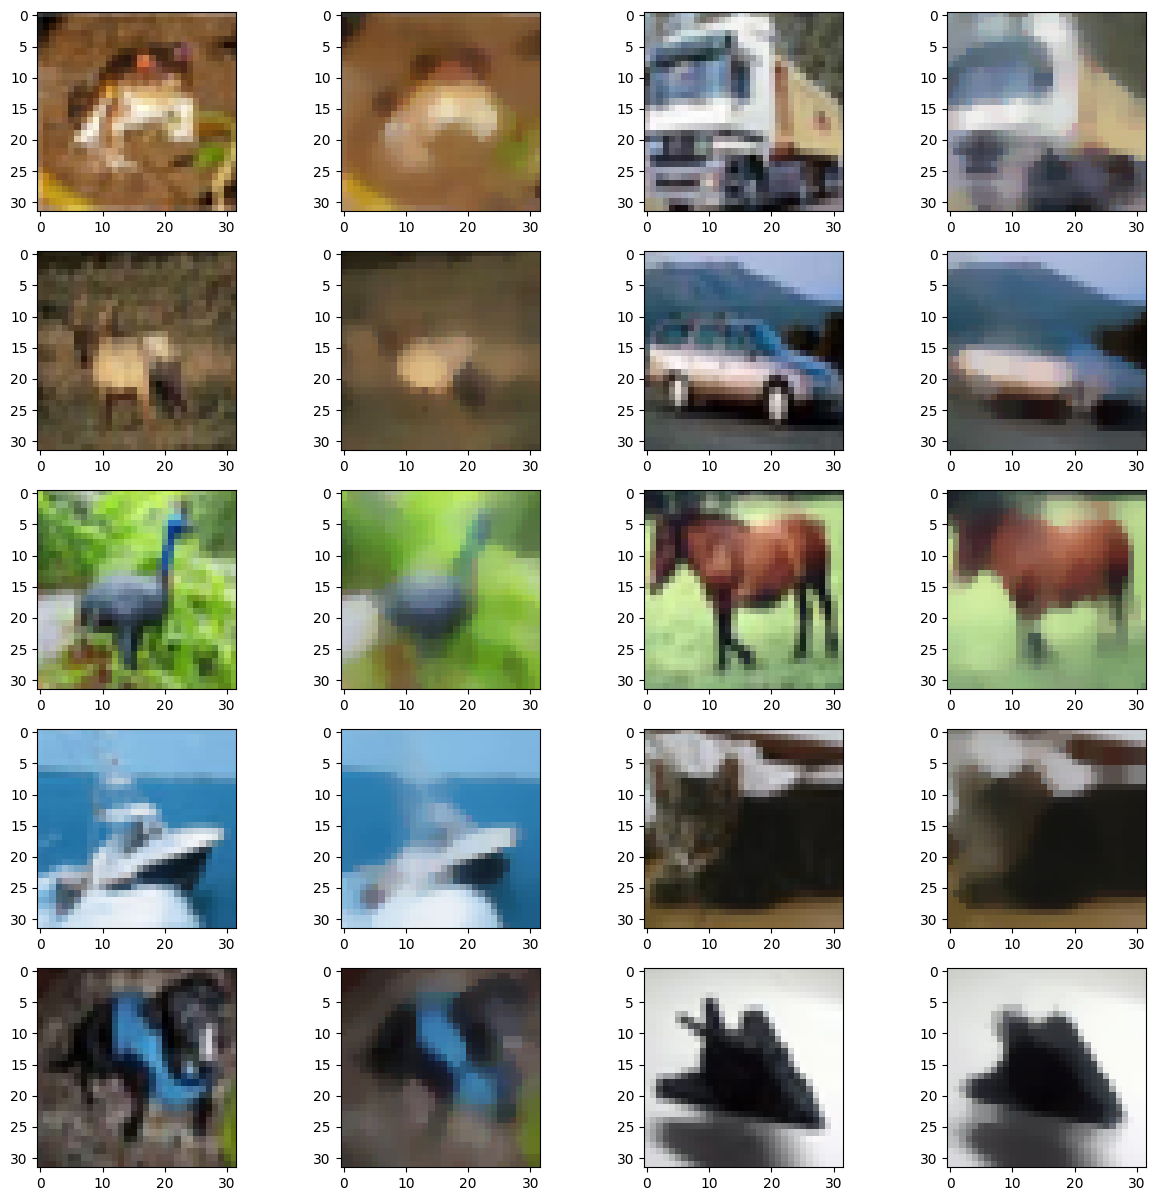

In [ ]:
#Median Filter (src, ksize)
# kernel size: 5x5
# Default followed by filtered image
fig,axs = plt.subplots(5,4,figsize=(15,15))
for i in range(10):
  axs[int(i*2/4),(i*2)%4].imshow(imgs[i])
  axs[int(i*2/4),(i*2)%4+1].imshow(cv2.medianBlur(imgs[i],5))
plt.show()

Gaussian sigma = 1

Frog:
  - Gaussian: The general shape and epth are still retained despite being blurred. Sharp changes in colors are lost and instead smoothly transitioned.
  - Average: The frog appears the most blurred out of the three filtered images.While the leg is blurred, the general shape and depth are still present. However, small details and minor changes in colors are lost.
  - Median: The frog appears rounder as the edges are smoothed out. The frog also appears much smaller as its outline fuses with the background. The filtered image also loses the most information on the leg as it appears more bent and thicker than usual.

  Verdict: Gaussian filter as the overall shape and depth of the frog is retained.

Truck:
  - Gaussian: Sharp changesat the front of the truck are lost and instead fused/smoothly transitioned. However, the general shape of the truck is still retained (such as the two "horns" of the truck and the wheels being identifiable).
  - Average: While the back of the truck (yellow section) is fine, the left side of the image is larger than the original as it fuses with the background. The botton-front of the truck is also less discernable as the intricate black details in the original are now fused into one or two black smudged. The wheel is also no longer discernable as the white and black parts of the wheel are now a gray smudge.
  - Median: The bottom-front of the truck appears as an upsidedown triangle making the it appear smaller than usual. The truck's jagged upper-half are now smoothened. The wheel and front section are now fused.

  Verdict: Gaussian filter. Average filter causes the truck to appear partially off-screen and larger than usual. Median filter causes the front of the truck to appear as a bunny (distortion of shape).

Deer:
  - Gaussian: The depth between the deer's head and its upper hody clash. However, the lower body and the legs retain their depth. The deer shape is retained. The background details are still maintained overall.
  - Average: The horns are lost in the filtered image. It is difficult to discern the shape of the deer as it no longer appears triangular as the original. The deer also appears bulkier than originally (both the front two legs and its upper body). The general background details are maintained.
  - Median: The shape of the deer is almost entirely lost/distorted. The head appears as a brown smudge with it's upper head merged with the background. The front two legs and whitish tail are completely gone.

  Verdict: Gaussian filter. Median filter completely loses the deer as we lose all sense of depth (can't tell if it's facing forward or backwards). For average filter, it is difficult to tell what kind of creature is in the filtered image as it loses its deer horns. Gaussian filter still retains the horns and the general shape of the deer.

Car:
  - Gaussian: The car loses the back part of the car's upper frame (on the leftmost side), resulting in the car appearing as an usual truck. The rest of the thin frame is still discernable from the blue background. The white part of the tires are also easily discernable from the black shadows.
  - Average: The car loses the back part of the car's upper frame. The 2 frames making up the middle window are fused as one. The roof of the car is still discernable. The car appears elongated as the car stretches past the left and right edges of the image. The tires also appear bulkier than usual and replaced with gray smudges. The mountain in the background greatly loses detail. The trees on the right also appear smoother and lose their sense of depth.
  - Median: The upper half of the car is fused with the blue mountain. The front of the car is fused with the blue reflection. The trees and mountain lose their detail and depth. The car now looks like a flatter sedan as the tires appear smaller and as gray smudges.

  Verdict: Gaussian Filter. Median filter completely distorts information about the car. While Gaussian and Average filter have similar results, the deciding factor was the retention of the white tires.

Peacock:
  - Gaussian: The shadow details on the peacock as well as the environment are generalized while still retaining a sense of depth. The peacock's mohawk is still visible. The beak of the peacock is barely visible and could easily be mistakened for an obstructing tree. The dark green at the top could now be interpreted as on top of the peacock (distortion of depth).
  - Average: The peacock's neck is thicker than usual. The face is completely obscured as a blue round smudge. The peacock's mohawk is lost. The peacock's neck and face lose their bright blue color. The peacock's body appears smaller than usual with thicker'shorter legs. Aside from the peacock's neck and the dark green patch at the top, the sense of depth is still retained.
  - Median: The peacock's head is completely lost. The sense of depth in the background is distorted as the left green appears closer than usual. The peacock's leg appear thicker and shorter than usual.

  Verdict: Gaussian Filter. Both Average and Median filter lose/distorts the peacock too much especially the head. However, all filters cause confusion in the depth of the upper right dark green patch.
    
Horse:
  - Gaussian: The small white patch on the horse's snout is lost. The general shape of the horse is retained and the front two legs are easily discernable.
  - Average: The horse's head is distorted as it appears to look away from the camera. The brown smudge and be interpreted as a dirt road rather than the horse's face. The belly of the horse appears smaller. The front two legs are fused together although the bending section is still visible. The right hind leg is fused with the green background. Some muscle details are lost.
  - Median: The body of the horse (aside from the head) looks like that of a cow. The shape of the horse's face is retained.The hind legs are fused together. All details of muscle are smoothened out.

  Verdict: Gaussian filter. Median filter causes the horse to look like a mule/cow with a horse head. While the Average filter retains the horse's body, the information of the face is distorted. Not only that, there is a loss in muscle details.

Boat:
  - Gaussian: The intricate details of the mast are blurred into a single pole. The reflected brightness on the ship's hull are toned down into a milder white. However, a sense of depth is still retained.
  - Average: The mast the ship is blurred but can still be interpreted as part of the ship. The wave and the back of the ship have fused together. The top of the ship apepars smaller than originally.
  - Median: The front of the ship appears smoother. The details at the top of the ship are lost. The mast is barely visible as a gray smudge and could easily be interpreted as a cloud in the background. Overall, the ship now looks like a jetski.
  
  Verdict: Average filter. Both Gaussian and Average filter produced similar images while retaining the shape and depth. However, Gaussian removes more intricate details such as the thin components of the mast while Average filter retains a slight bit of detail. Median filter makes the boat smaller and smoothens the upper portion of the ship.
  
Cat:
  - Gaussian: The shape and outline of the cat is retained. However, details such as the white chin are clurred out. The white blanked in the background is also less bright.
  - Average: The cat appears slightly thinner than the original. The background blanked is less refined and it is harder to distinguish the shapes clearly. The cat's face is very  blurred with a gray-brownish smudge.
  - Median: The sharp edges in the original are now replaced with choppier smoothness. For example, the cat's ears are shorter and fatter. The thin arms are now small pudgy arms. The jagged blanked in the background is now somewhat thicker/smoother.

  Verdict: Gaussian. Both Gaussian and Average filter produced similar results. However, the Gaussian filter better retains the jagged blanket in the background. The Median filter makes the cat's face smaller and rounder than it is actually is especially the ears.

Dog:
  - Gaussian: The shape of the dog is retained and there is a clear distinguish from the dog and its blue shirt. The legs are blurrier, especially the hind legs.
  - Average: There is a loss of depth and details in the dog's face. The hind leg is thicker and is hard to distinguish between the dog's main body and the actual leg.
  - Median: The dog appears a lot smaller and rounder than the original. The tail is shortened to a black nub. The hind leg completely disappears. The front legs slowly transition into the brown background. The right side of the dog's face is alsmot entirely lost.

  Verdict: Gaussian filter. The Gaussian filter does a slightly better job in retaining details of the dog's face, the tail, and the hind leg than Average filter. Median filter as usual distorts too many details.

Jet:
  - Gaussian: The Gaussian filter turns the sharpm thin jet tail into two thicker black line smudges. However, there is still a retention of depth and orientation of the jet as well as its shadow.
  - Average: The twin tail is less discernable. The jet's shadow is slightly altered. There is a slight loss in light depth on the jet's right wing.
  - Median: The twin tail is now fused into one. The wings are less sharp and rounder. The jet overall is much smaller. The shadow is also rounder and looks attached to the jett rather than simply being its shadow.

  Verdict: Gaussian filter. The Gaussian filter better retains depth in the jet's right wing light reflection.


In short, Median filter is best used when the original image contains monochromatic details and round edges. This will remove any salt and pepper noises.  Average filter is computationally efficient and is effective for reducing uniform noises. It is also useful in retaining some intricate details like thin edges. Gaussian filter provides smoothing while retaining the overall shape and depth. However, it occasionally removes thin edges from the image (like the mast of the shipe).

Gaussian filter should be used in most cases.

Problem 2: Edge Detection

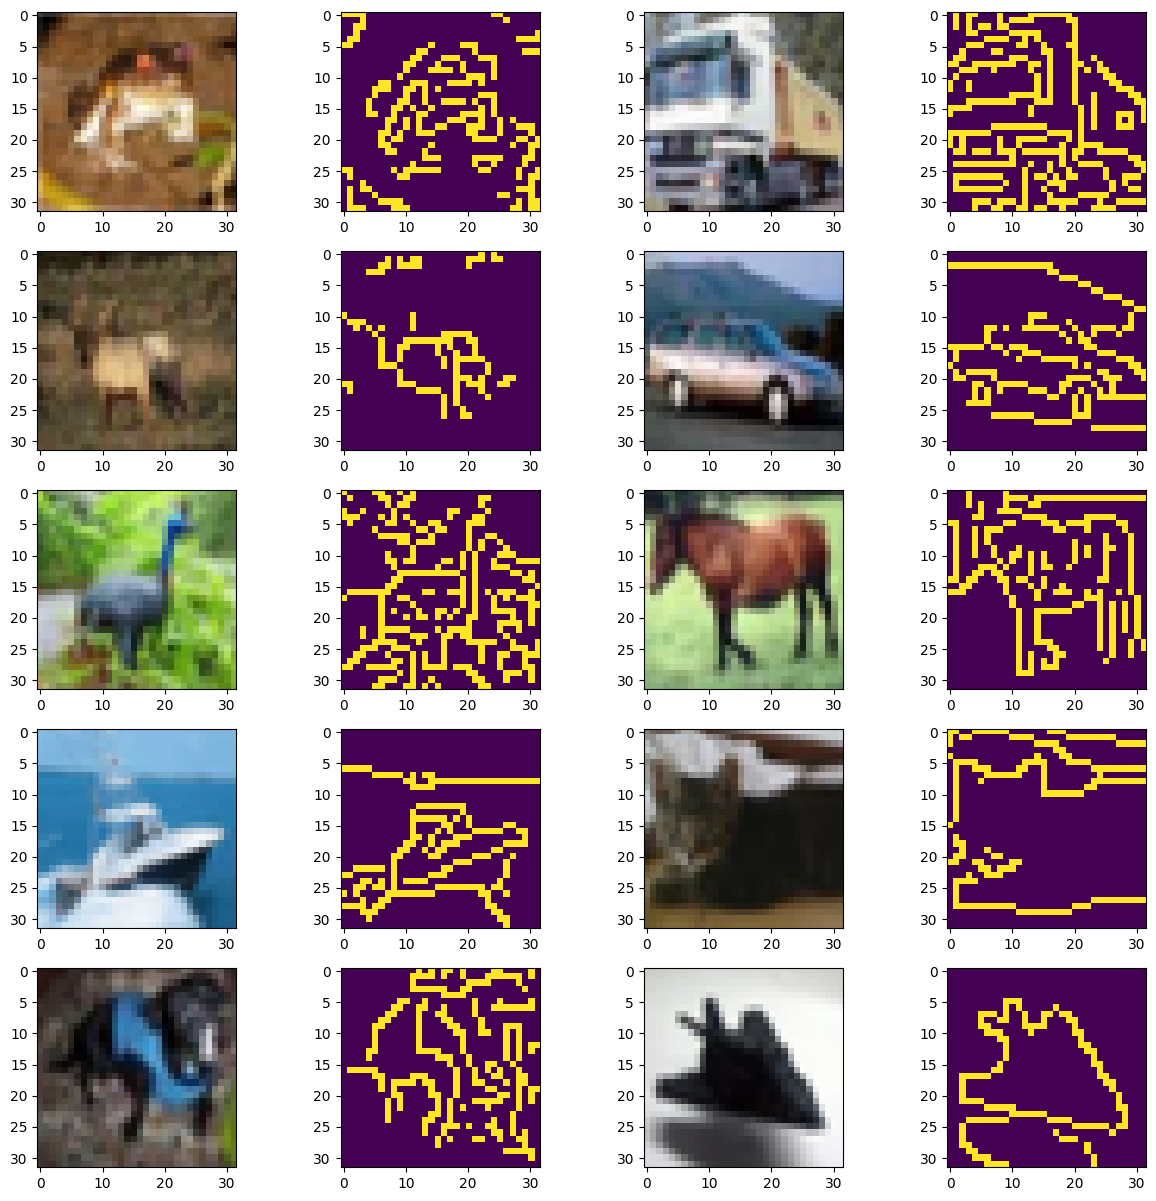

In [ ]:
# Canny Edge Detection
# Threshold: 200,255
fig,axs = plt.subplots(5,4,figsize=(15,15))
for i in range(10):
  axs[int(i*2/4),(i*2)%4].imshow(imgs[i])
  axs[int(i*2/4),(i*2)%4+1].imshow(cv2.Canny(imgs[i], 200,255))
plt.show()

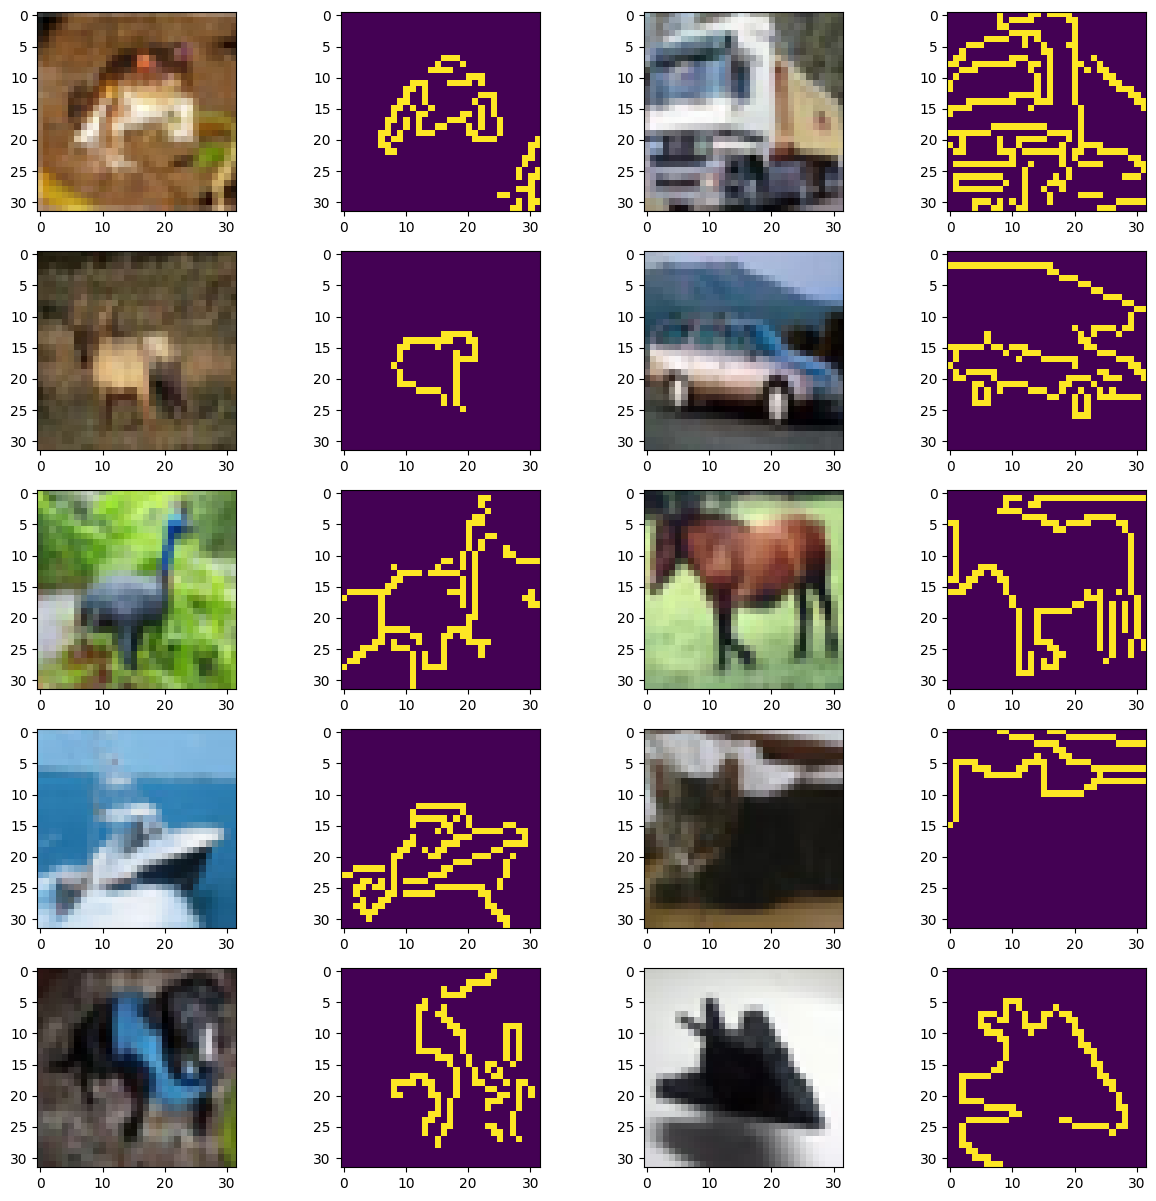

In [ ]:
# Canny Edge Detection
# Increasing Thresholds: 300, 500
fig,axs = plt.subplots(5,4,figsize=(15,15))
for i in range(10):
  axs[int(i*2/4),(i*2)%4].imshow(imgs[i])
  axs[int(i*2/4),(i*2)%4+1].imshow(cv2.Canny(imgs[i], 300,500))
plt.show()

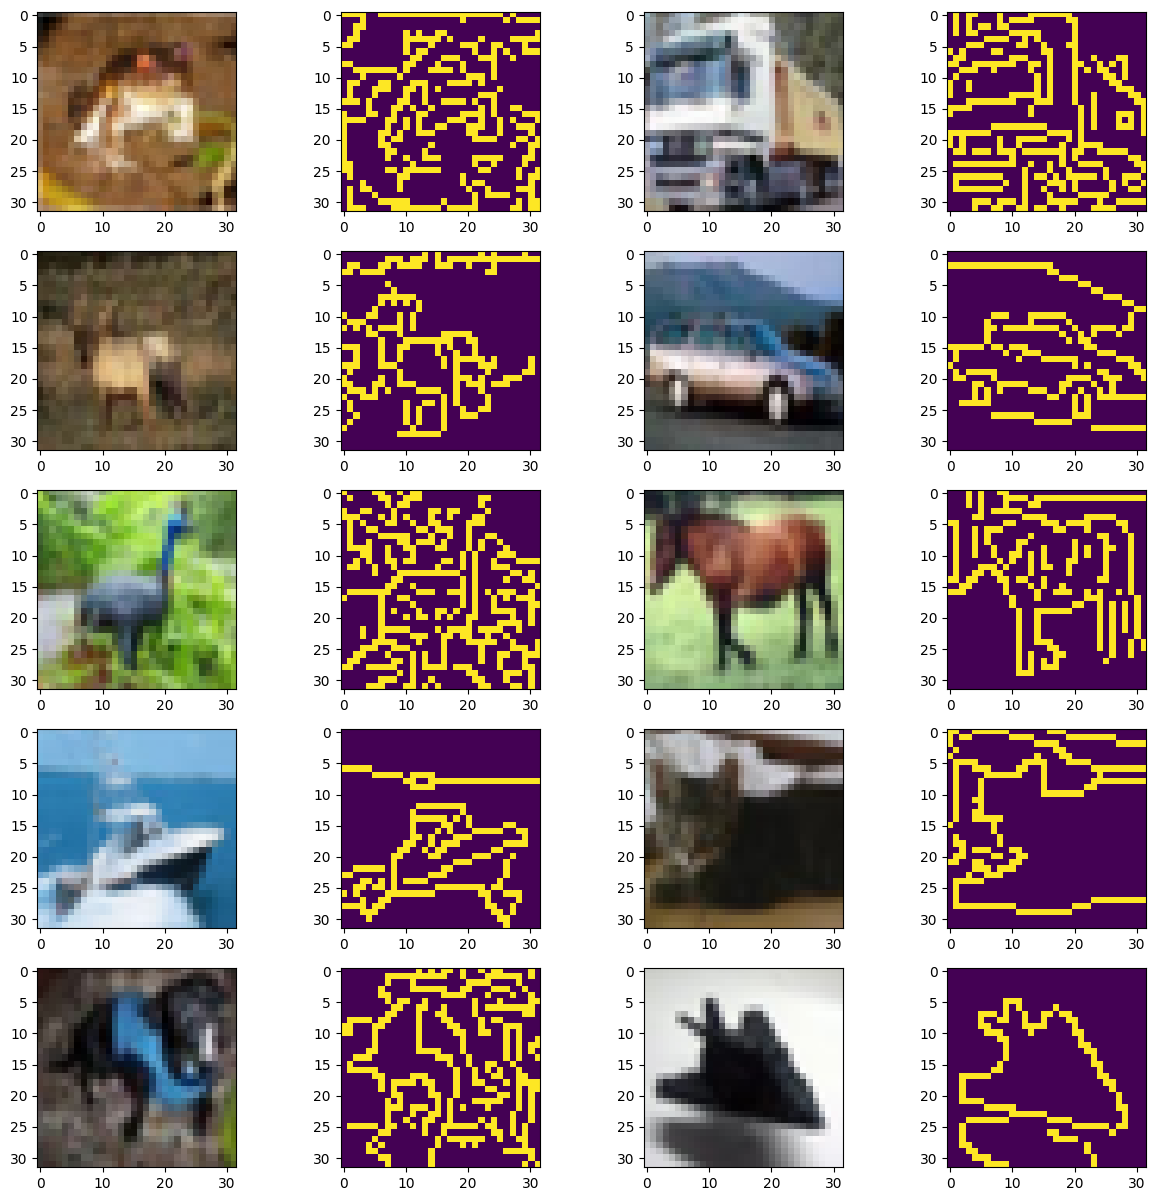

In [ ]:
# Canny Edge Detection
# Decreasing Thresholds: 85, 255
fig,axs = plt.subplots(5,4,figsize=(15,15))
for i in range(10):
  axs[int(i*2/4),(i*2)%4].imshow(imgs[i])
  axs[int(i*2/4),(i*2)%4+1].imshow(cv2.Canny(imgs[i], 85,255))
plt.show()

The three thresholds tested are: (200, 255), (300, 500), and (85, 255)

As we increase the threshold, less edges are detected by the Canny Edge Detector. This can be seen when we compared the outputs of (300,500) to the other two.

As we decrease the threshold, more edges are detected and the output has more details. We can see this by comparing the outputs of (200, 255) and (85,255).

We can conclude that the thresholds set are important as having too large of a threshold can lead to not capturing enough information from the image, whereas having too small of a threshold can lead to an overload of information (which can be seen in some of the outputs of (85,255)).

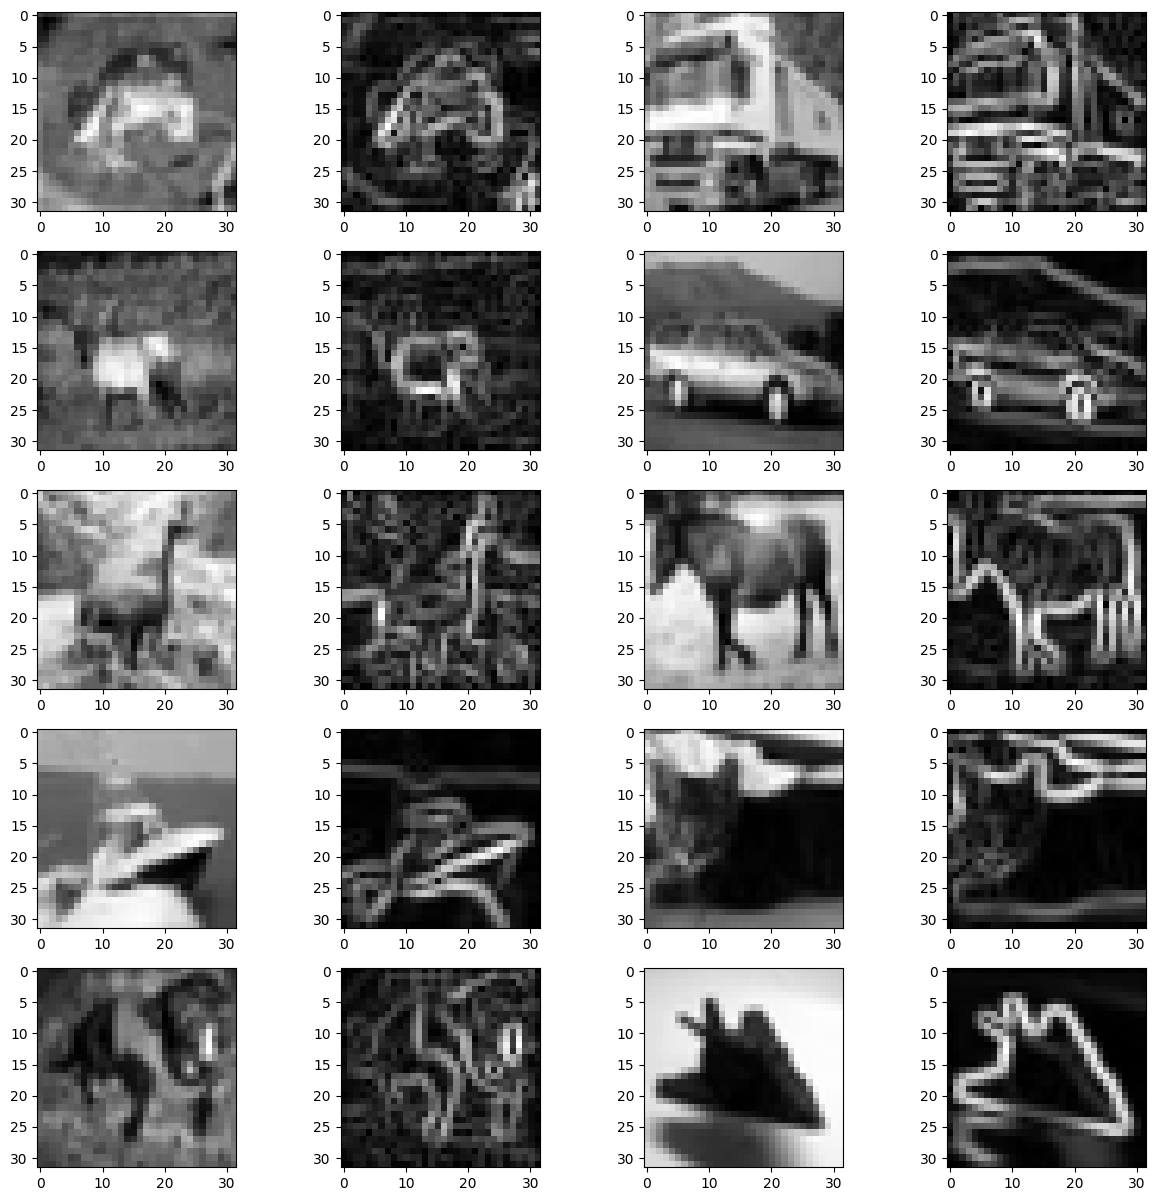

In [ ]:
# Sobel Filter
fig,axs = plt.subplots(5,4,figsize=(15,15))
for i in range(10):
  # Convert image into gray scale
  image = cv2.cvtColor(imgs[i], cv2.COLOR_RGB2GRAY)

  sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
  sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

  # Combine x and y Sobel outputs
  sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)

  # Normalize the result to [0, 255]
  sobel_combined = np.uint8(255 * sobel_combined / np.max(sobel_combined))

  axs[int(i*2/4),(i*2)%4].imshow(image, cmap='gray')
  axs[int(i*2/4),(i*2)%4+1].imshow(sobel_combined,cmap='gray')
plt.show()


Based on my observations, the Sobel filter struggles when there is a lot of noise and details in the background. This can be seen in the peacock and dog image as various parts in the background are considered "edges." The Sobel filter also struggles with lumpy shapes such as the frog and dog. The Canny Edge detector's performance varies with the thresholds. However, once you have the proper thresholds, its performance is acceptable as seen by the frog, cat, and horse.

For time efficiency, I would use the Sobel filter. However, if given time to test various thresholds, I would use the Canny Edge detector to remove unwanted background details.

Problem 3: Corner Detection

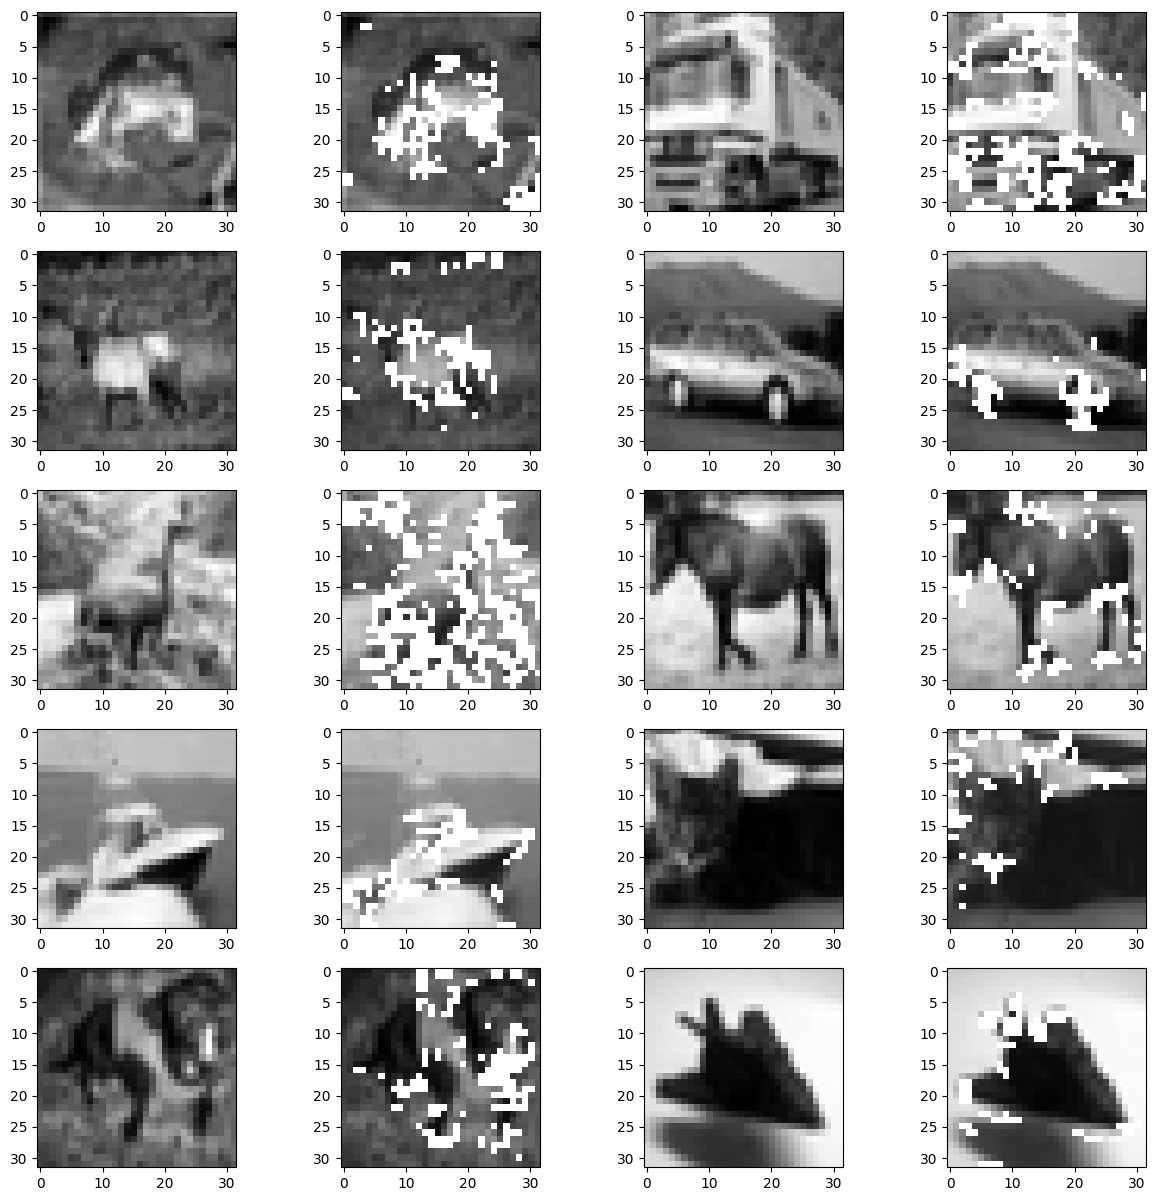

In [ ]:
# Corner Detection
fig,axs = plt.subplots(5,4,figsize=(15,15))
for i in range(10):
  # Convert image to grayscale
  operatedImage = cv2.cvtColor(imgs[i], cv2.COLOR_BGR2GRAY)

  # Convert image to float32
  operatedImage32 = np.float32(operatedImage)

  # Obtain the threshold from image (0.05 arbitrary value)
  harris = cv2.cornerHarris(operatedImage32, blockSize = 2, ksize = 3, k = 0.04)
  threshold = 0.01 * harris.max()

  # Draw corners on image
  imgc = operatedImage.copy()
  imgc[harris > threshold] = 255

  axs[int(i*2/4),(i*2)%4].imshow(operatedImage, cmap = 'gray')
  axs[int(i*2/4),(i*2)%4+1].imshow(cv2.cvtColor(imgc, cv2.COLOR_BGR2RGB))
plt.show()

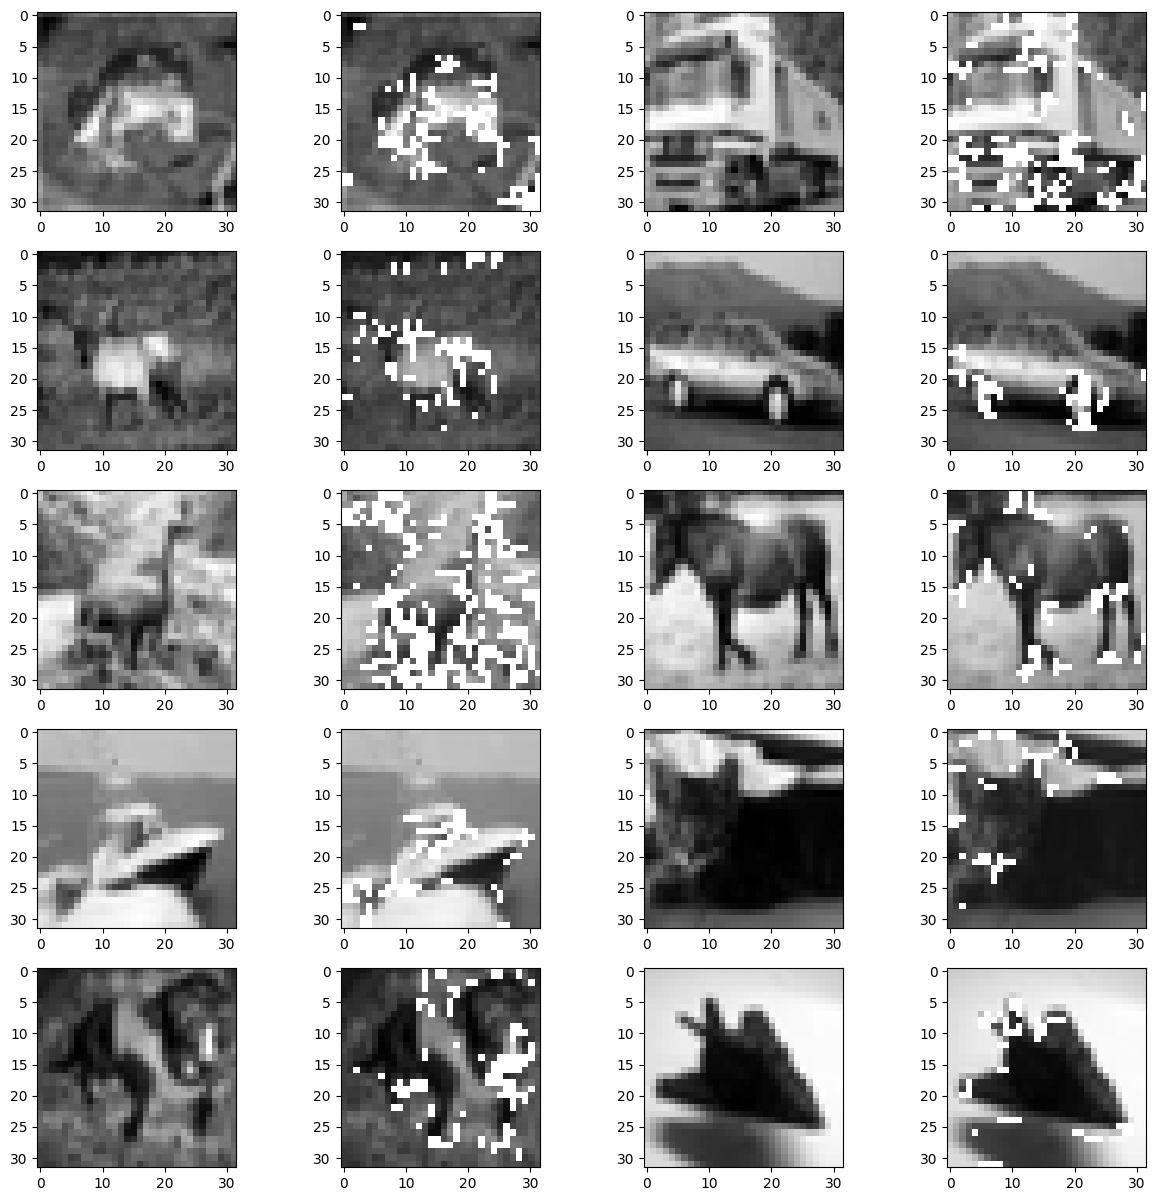

In [ ]:
# Corner Detection
fig,axs = plt.subplots(5,4,figsize=(15,15))
for i in range(10):
  # Convert image to grayscale
  operatedImage = cv2.cvtColor(imgs[i], cv2.COLOR_BGR2GRAY)

  # Convert image to float32
  operatedImage32 = np.float32(operatedImage)

  # Obtain the threshold from image (0.05 arbitrary value)
  harris = cv2.cornerHarris(operatedImage32, blockSize = 2, ksize = 3, k = 0.07)
  threshold = 0.01 * harris.max()

  # Draw corners on image
  imgc = operatedImage.copy()
  imgc[harris > threshold] = 255

  axs[int(i*2/4),(i*2)%4].imshow(operatedImage, cmap = 'gray')
  axs[int(i*2/4),(i*2)%4+1].imshow(cv2.cvtColor(imgc, cv2.COLOR_BGR2RGB))
plt.show()

Although barely noticeable, increasing the parameter value from 0.04 to 0.07 causes the Harris Corner algorithm to be more selective when identifying corners. This can be observed in images like the cat and jet where there are fewer white pixels which indicate a corner.

This is also supported by the equation: R = pq - k(p + q)^2

Increasing the value of k decreases the value of R which would decrease the number of pixels that pass the threshold (0.05 * (max detected in harris corner algorithm))

Problem 4: Convolution and Correlation

In [ ]:
def convolution2D(image, kernel):
    # Flip kernel
    kernel = np.flipud(np.fliplr(kernel))

    # Pass through correlation2D
    return correlation2D(image, kernel)

def correlation2D(image, kernel):
    # Get dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Pad the image
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant')

    # Initialize the result
    corr = np.zeros_like(image)

    # Perform correlation
    for i in range(image_height):
        for j in range(image_width):
            corr[i, j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return corr

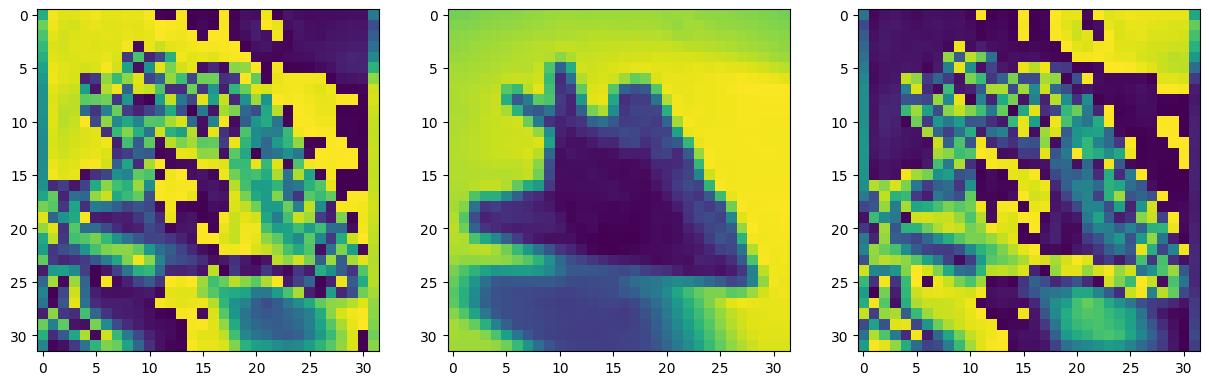

In [ ]:
image = imgs[9]

# OUR KERNEL 3x3
kernel = np.array([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]])

# Convert image to grayscale if it's an RGB image
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform 2D convolution
conv_result = convolution2D(image, kernel)

# Perform 2D correlation
corr_result = correlation2D(image, kernel)

fig,axs = plt.subplots(1,3,figsize=(15,15))
axs[0].imshow(conv_result)
axs[1].imshow(image)
axs[2].imshow(corr_result)

The kernel used by 3x3. [-1,0,1 ; -2, 0, 2 ; -1, 0, 1] which is the X-direction Sobel kernel.

When implementing 2D-Convolution and 2D-Correlation, I added padding to the original image.

A noticeable difference between outputs is the inverse of brightness between the two images. For example, the bright yellow images on the left image are dark purple on the right image and vice versa. It is also visisble between the variations of green and blue.

2D-convolution works from bottom to top as it moves from right to left. Another way to interpret this is to flip the kernel over horizontally and vertically and then pass it through the 2d-correlation.

2D-correlation works from top to bottom as it moves from left to right.

As a result, the kernel in 2D-convolution would become [1,0,-1 ; 2,0,-2 ; 1,0,-1] which is essentially only flipping the kernel over the vertical axis. It would make sense then that the color outputs between the two outputs are simply opposites/inverse of each other.





Citation:

Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.